In [2]:
using LightGraphs
using GraphPlot
using GraphRecipes
using Plots
using MatrixDepot

include group.jl for user defined matrix generators
verify download of index files...
reading database
adding metadata...
adding svd data...
writing database
used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index


In [41]:
include("dice_library.jl")

Main.Dice

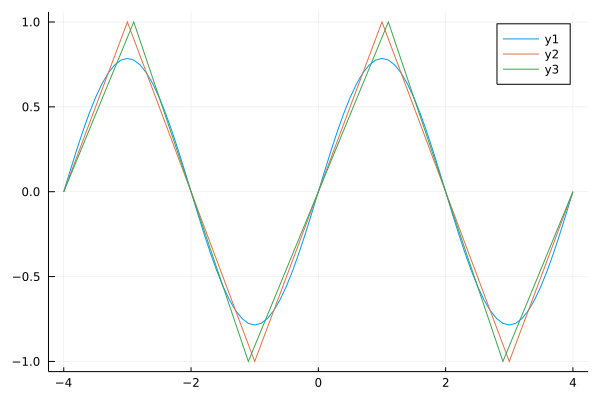

In [6]:
xran = collect(-4:0.1:4)
plot(xran, Dice.sine(xran))
plot!(xran, Dice.triangular(xran))
plot!(xran, Dice.skew_triangular(xran))

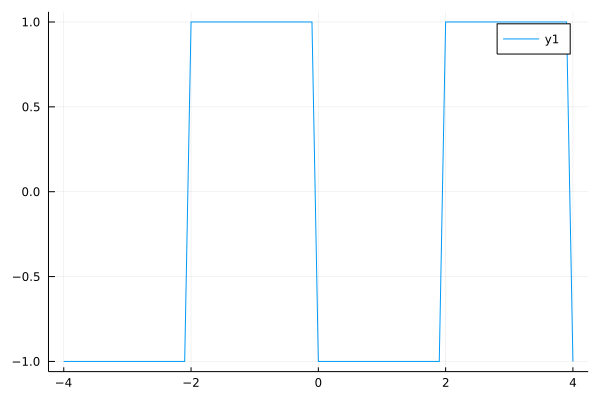

In [8]:
plot(xran, Dice.square(xran))

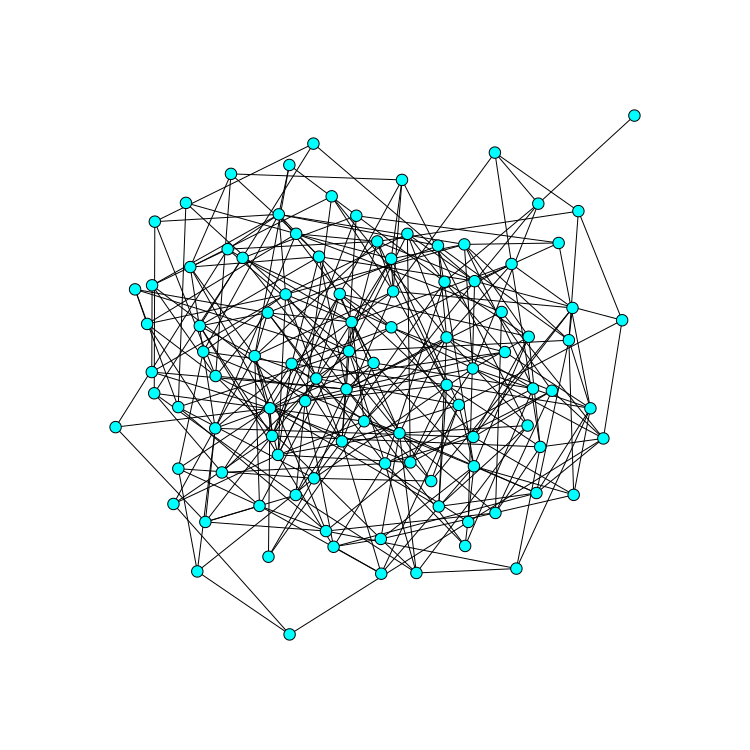

In [11]:
Gr = Dice.get_connected(100, 0.06)
graphplot(Gr, nodesize = 0.1, nodeshape=:circle, curves=false, nodecolor=:cyan, size=(750, 750))

In [52]:
G = Gr

mtd1 = Dice.sine
mtd2 = Dice.triangular
mtd3 = Dice.skew_triangular
mtd4 = Dice.bisine
scale = 5/nv(G)

Ks = 1*0.00

tmax = 250
V1 = Dice.get_initial(nv(G),(-0.5,0.5));
V2 = copy(V1); # .+ 0.1 .* DyNN.get_initial(nv(G),(-0.1,0.1));
V3 = copy(V1);
V4 = copy(V1);

In [53]:
V1t = Dice.trajectories(G, mtd1, 0.01, scale, tmax, V1);
V2t = Dice.trajectories(G, mtd2, 0.01, scale, tmax, V2);
V3t = Dice.trajectories(G, mtd3, 0.01, scale/1, tmax, V3);
V4t = Dice.trajectories(G, mtd4, 0.001, 1.2*scale/1, tmax, V4);

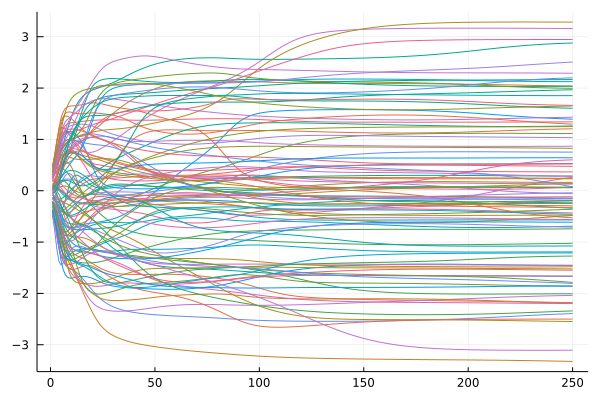

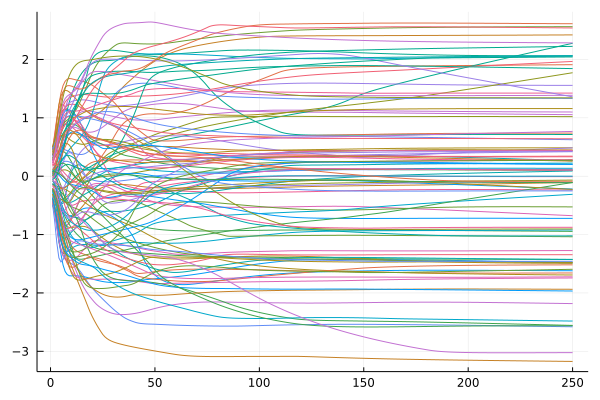

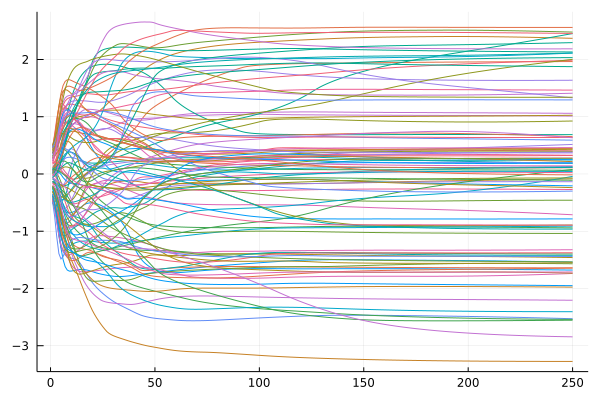

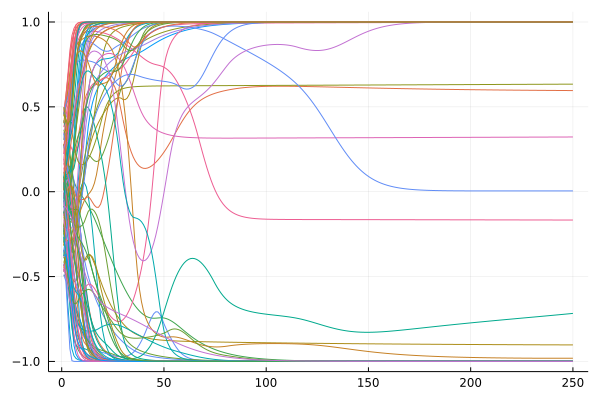

In [54]:
display(plot(1 .*(1:tmax), (V1t)', legends = false)) #,markershape=:circle) #, seriestype = :scatter)
display(plot(1 .*(1:tmax), (V2t)', legends = false)) #,markershape=:circle) #, seriestype = :scatter)
display(plot(1 .*(1:tmax), (V3t)', legends = false)) #,markershape=:circle) #, seriestype = :scatter)
display(plot(1 .*(1:tmax), (V4t)', legends = false)) #,markershape=:circle) #, seriestype = :scatter)

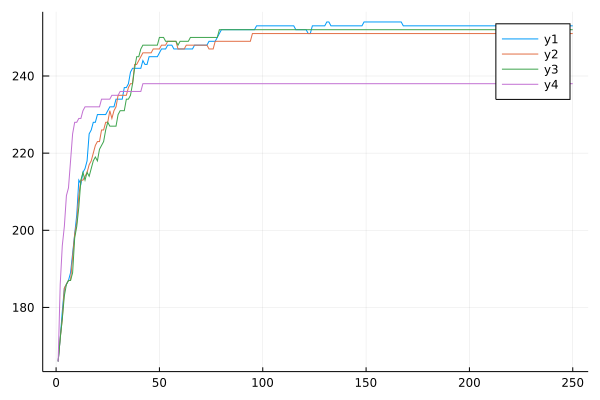

In [55]:
cuts1 = [Dice.get_best_cut(G,Dice.roundup(V1t[:,i])) for i in 1:size(V1t)[2]]
cuts2 = [Dice.get_best_cut(G,Dice.roundup(V2t[:,i])) for i in 1:size(V1t)[2]]
cuts3 = [Dice.get_best_cut(G,Dice.roundup(V3t[:,i])) for i in 1:size(V1t)[2]]
cuts4 = [Dice.get_best_cut(G,Dice.roundup(V4t[:,i])) for i in 1:size(V1t)[2]]
plot(cuts1)
plot!(cuts2)
plot!(cuts3)
plot!(cuts4)

In [124]:
println("$mtd1 : $(cuts1[end])  %% $mtd2 : $(cuts2[end])  %% $mtd3 : $(cuts3[end])")

sine : 226.0  %% triangular : 226.0  %% skew_triangular : 230.0


In [125]:
maximum(cuts3)

230.0